### HASHING ###

#### Why Hashing? ####
- Hashing provides fast searcing.
- Python Dictionary works on Hashing.

#### Comparing Some Searching Algorithims ####

- **Linear Search** - check every item from start -> if get the item then break, time complexity is O(n).
- **Binary Search** - sort the array -> compare middle item with the item -> if the item is smaller than the middle item do same in the first half of the array -> if the item is bigger than the middle item do same in the second half of the array, time complexity is O(logn).

- Hashing do searching in constant time i.e. O(1) time complexity.
- We put the item in array on a index position that you got from the hashing function.

#### Example ####
- [index0, index1, index2, index3, index4, index5] -> empty array.
- We have to insert items (11, 22, 33, 44, 55, 100) in the array such that searching of element is in O(1).
- Let hasing function be (index no. = item % 10) -> this can be any function according to situation.
- 11 % 10 = 1 -> index1
- 22 % 10 = 2 -> index2
- 100 % 10 = 0 -> index0 ... so on
- Now if we wnt to search a item in array we will pass the item in hashing function to get its index position directly in O(1).
- Search for 55 -> 55 % 10 = 5 -> i.e. index5

#### Problems #####
- Hashing collision is very common -> when two item gets same hash value(index value) after hashing function.

   - Let items be (31, 47, 16, 21, 37) | hashing function = item % len(array)
   - 31 % 5 = 1
   - 47 % 5 = 2
   - 16 % 5 = 1 -> collision since index1 is already occupied by 31
   - 21 % 5 = 1 -> again collision
   - 37 % 5 = 2 -> collision since index2 is already occupied by 47

#### Solution ####
1) ##### Closed Addressing Technique #####
   If collision occur. In Closed Addressing Tehnique, we keep item in same memory location.

   - **Chaining** 
      - In chianing the array is made of LinkedList, each item of array is a linkedlist.
      - If collision happen the a linked list is created from the coollising position node parallel to the array.

        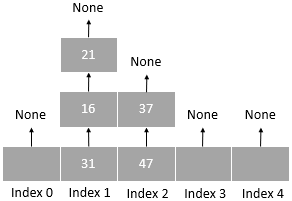
      - Problem in this is that there is a chance that chain size keep on increasing on a node and then again searching in that chain can go O(n) complexity.
      - Solution
      1) - **Rehashing** - We take a load factor -> if size of chain crosses load factor we increase the size of array -> and again start hashing from very start now with new array size.
         - E.g. - let say size of chain crosses load factor -> we increase size of array from 5 to 8 -> new hasing function is (index = item % 8) -> we repeat this if any chain again cross the load factor. (31 % 8 = 7 | 47 % 8 = 7 | 16 % 8 = 0 | 21 % 8 = 5 | 37 % 8 = 5) 
      2) - **Balanced Tree** - We take a load factor -> if size of chain crosses load factor -> we convert the chain to a balanced tree -> large value goes to right child, small value goes to left child -> Searching time complexity in balanced tree is O(logn).
         - The O(n) complexity of chain is now O(logn). 
         - This concept is used in Hash table of Java.

2) ##### Open Adderessing Technique #####
   If collision occur. In Open Addressing Technique, we keep the item in next empty memory location.

   - **Linear Probing**
      - let say we have to insert items(36, 41, 22, 37, 51) in [index0, index1, index2, index3, index4] such that searching is fast.
      - lets again take hash function index = item % len(array)
      - 36 % 5 = 1 -> index1
      - 41 % 5 = 1 -> collision with 36
      - In linear Probing we insert the item in next empty cell -> i.e. 41 goes at index2
      - 22 % 5 = 2 -> collision with 41 -> 22 goes at index3
      - 37 % 5 = 2 -> collosion with 41 -> 37 goes at index3 -> collision with 22 -> 37 goes to index4
      - 51 % 5 = 1 -> collision at all index -> 51 goes to index0
      - In linear probing we make sure that the array has more space than the number of item inserting.
      - We achive the above process with below hash function.
      - Hash Function of Linear Probing is `G(I) = [H(I) + K(I')] % Size` where `H(I) = I % Size` and `K(I')` is identity function i.e. `K(I') = I'`[K(0)=0, K(1)=1, K(2)=2...].
      - If you are doing hashing for the first time for a item then I'=0, for second time I'=1, for third time I'=2 and so on.
      - Problem with Linear Probing is that for a very big array it creates clusters of stored item and wastage of memory occur.

        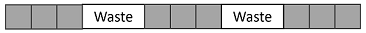
      - To reduce this wastage Quadratic Probing is introduced. 
   - **Quadratic Probing**
      - Hash Function of Quadratic Probing is `G(I) = [H(I) + K(I')] % Size` where `H(I) = I % Size` and `K(I')` is identity function i.e. `K(I') = (I')^2`[K(0)=0, K(1)=1, K(2)=4, K(3)=9...].
      - If you are doing hashing for the first time for a item then I'=0, for second time I'=1, for third time I'=2 and so on.


**Linear Probing in Python Hashing**

In [155]:
# we will create a class Dictionary taking size input.
# we will create two arrays(slots and data) of same size in the constructor to store keys(slots) and values(data).
# suppose we have pair ("python" : 37).
# we will calculate hash value(index value) of "python"(key).
# lets suppose hash value is 2 -> we will store "python" at index2 of slots array.
# we will store 37 at index2 of data array.

class Dictoinary:
    def __init__(self, size):
        self.size = size
        self.slots = [None]*self.size 
        self.data = [None]*self.size
    
    def hash_function(self, key):
        # returns the hash value(index value) for a key
        return abs(hash(key)) % self.size # hash method of python give a integer hash value for any data(only immutable datatype) passed in it

    def put(self, key, value):
        hash_value = self.hash_function(key)

        # case 1 -> index position is empty
        if self.slots[hash_value] == None:
            self.slots[hash_value] = key
            self.data[hash_value] = value
        #case 2 -> index position is not empty
        else:
            # case 1 -> same key already present -> that means user is updating value of key
            if self.slots[hash_value] == key:
                self.data[hash_value] = value
            # case 2 -> new key value pair -> we do linear probing -> go to next empty(rehashing)
            else:
                new_hash_value = self.rehash(hash_value)
                
                while (self.slots[new_hash_value] != None) and (self.slots[new_hash_value] != key):
                    new_hash_value = self.rehash(new_hash_value)

                # if loop breaks from condition 1(self.slots[new_hash_value] != None)
                if self.slots[new_hash_value] == None:
                    self.slots[new_hash_value] = key
                    self.data[new_hash_value] = value
                # if loop breaks from condition 2(self.slots[new_hash_value] != key)
                else:
                    self.data[new_hash_value] = value

    def __setitem__(self, key, value):
        # to use python dictionary notation for adding or updating a pair
        self.put(key, value)

    def get(self, key):
        start_position = self.hash_function(key)
        current_position = start_position

        while self.slots[current_position] != None: # if we encounter none that means the searched key was never put in the dictionary
            # if key matches with key in slots 
            if self.slots[current_position] == key:
                return self.data[current_position]
            
            current_position = self.rehash(current_position)
            
            # if we came back to starting position -> array has no empty element and also not the search key
            if current_position == start_position:
                return "Not Found (reached start position)"
            
        return "Not Found (reached None)"
    
    def __getitem__(self, key):
        # to use python dictionary notation for getting a value from key
        return self.get(key)
    
    def rehash(self, old_hash):
        return (old_hash + 1) % self.size # becoz in linear probing we move to next

    def __str__(self):
        for i in range(len(self.slots)): # can also use self.size here
            if self.slots[i] != None:
                print(f"{self.slots[i]} :- {self.data[i]}")
                
        return "" 
    
            


In [156]:
hash("python")

-5283742474819247656

In [157]:
d1 = Dictoinary(4)
print(d1.slots)
print(d1.data)

[None, None, None, None]
[None, None, None, None]


In [158]:
d1.put("python", 45)

In [159]:
print(d1.slots)
print(d1.data)

['python', None, None, None]
[45, None, None, None]


In [160]:
d1.put("java", 1200)

In [161]:
d1["html"] = 100 # due to __setitem__ magic method we are able to use this notation

In [162]:
d1["python"] = 80 # due to __setitem__ magic method we are able to use this notation

In [163]:
print(d1.slots)
print(d1.data)

['python', 'java', 'html', None]
[80, 1200, 100, None]


In [164]:
print(d1.get("python"))
print(d1.get("java"))
print(d1.get("html"))
print(d1.get("c"))

80
1200
100
Not Found (reached None)


In [165]:
d1["c"] = 30
print(d1.get("c++"))
print(d1["python"]) # due to __getitem__ magic method we are able to use this notation

Not Found (reached start position)
80


In [166]:
print(d1)

python :- 80
java :- 1200
html :- 100
c :- 30



**Ouadratic Probing in Python Hashing**

In [ ]:
# for implementing quadratic probing you just have to change the rehashing function

def rehash(self, old_hash):
        return (old_hash + 1) % self.size

# instead of (old_hash + 1) -> (old_hash + (I')^2)
# K(I') = (I')^2 -> [K(0)=0, K(1)=1, K(2)=4, K(3)=9...]

**Chaining in Python Hashing**

In [338]:
# we will create an array of LinkedList
# therefore, first we need a linkedList class

class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None 

    def add(self, key, value):
        new_node = Node(key, value)
        if self.head == None: # if first place is empty
            self.head = new_node # insert in first place
        else: # else traverse and insert at tail(or first empty place)
            current = self.head

            while current.next != None:
                current = current.next
            current.next = new_node
    
    def delete_head(self):
        if self.head == None: # if empty LL
            return "Empty"
        else:
            self.head = self.head.next

    def remove(self, key):
        if self.head.key == key:
            self.delete_head()
            return

        if self.head == None: 
            return "Empty"
        else:
            current = self.head
            while current.next != None:
                if current.next.key == key: 
                    break 
                current = current.next

        if current.next == None:
            return "Not Found"
        else:
            current.next = current.next.next 
    
    def traverse(self):
        current = self.head
        while current != None:
            print(current.key, "->", current.value)
            current = current.next
    
    def size(self):
        current = self.head
        counter = 0
        while current != None:
            counter += 1
            current = current.next
        return counter
     
    def search(self, key):
        current = self.head
        position = 0
        while current != None:
            if current.key == key:
                return position
            current = current.next
            position = position + 1  
        return -1

    def get_node_at_index(self, index):
        current = self.head
        counter = 0
        while current is not None:
            if counter == index:
                return current
            current = current.next
            counter += 1


class Dictionary:
    def __init__(self, capacity):
        self.capacity = capacity
        self.size = 0
        # create array of LinkedList
        self.buckets = self.make_array(self.capacity) # every LinkedList in this array is called a bucket thus array is called buckets

    def make_array(self, capacity):
        L = [] # create empty array
         # add LinkedList object in array according to the capacity
        for i in range(capacity): # we didn't use [LinkedList()]*capacity -> because this will add same LL object in array
            L.append(LinkedList()) # we used loop becoz it append different and new LL objects each time.
        return L
    
    def __setitem__(self, key, value): # to use python dictionary syntax for adding item
        self.put(key, value)
    
    def put(self, key, value):
        bucket_index = self.hash_function(key)
        node_index = self.get_node_index(bucket_index, key)

        if node_index == -1:
            # insert new key value pair
            self.buckets[bucket_index].add(key, value)
            self.size += 1

            load_factor = self.size / self.capacity
            # print(load_factor)
            if (load_factor >= 2): # checking loadfactor after every new insert for rehashing
                self.rehash()
        else:
            # update existing pair
            existing_node = self.buckets[bucket_index].get_node_at_index(node_index)
            existing_node.value = value

    def __getitem__(self, key):
        return self.get(key)

    def get(self, key):
        bucket_index = self.hash_function(key)
        response_index = self.buckets[bucket_index].search(key)

        if response_index == -1:
            return f"No item with key {key}"
        else:
            node = self.buckets[bucket_index].get_node_at_index(response_index)
            return node.value

    def __delitem__(self, key):
        bucket_index = self.hash_function(key)
        self.buckets[bucket_index].remove(key)

    def rehash(self):
        self.capacity = self.capacity * 2 # increase the capacity of array
        old_buckets = self.buckets # save the current array(buckets) as old_buckets
        self.size = 0 # making the size of array zero again
        self.buckets = self.make_array(self.capacity) # make new array with new capacity

        # populate the new buckets by taking out items from old_buckets
        for i in old_buckets: # for every LinkedList(bucket) in array(buckets)
            for j in range(i.size()): # iterating every node of bucket
                node = i.get_node_at_index(j)
                node_key = node.key
                node_value = node.value
                self.put(node_key, node_value)

    def get_node_index(self, bucket_index, key):
        node_index = self.buckets[bucket_index].search(key)
        return node_index

    def hash_function(self, key):
        return abs(hash(key)) % self.capacity

    def __str__(self):
        for i in self.buckets:
            i.traverse()
    
        return ""


In [339]:
L = LinkedList()
L.add(2,3)
L.add(4,5)
L.add(7,9)

In [340]:
L.traverse()

2 -> 3
4 -> 5
7 -> 9


In [348]:
D1 = Dictionary(4)
D1.buckets

In [349]:
D1["python"] = 100
D1["javascript"] = 200

In [350]:
D1["python"]

100

In [351]:
D1.put("javascript", 600)
D1["php"] = 120
D1["html"] = 120
D1["css"] = 120

In [352]:
print(D1)

python -> 100
css -> 120
javascript -> 600
html -> 120
php -> 120



In [353]:
del D1["python"]

In [354]:
D1["python"]

'No item with key python'

In [355]:
print(D1)

css -> 120
javascript -> 600
html -> 120
php -> 120



**Hashing Implementation using List**

In [14]:
class HashTable:
    def __init__(self):
        self.MAX = 10
        self.arr = [None for i in range(self.MAX)] # list with all element None

    def hash_function(self, key):
        h = 0
        for cha in key:
            h += ord(cha) # sum of ASCII value of all the character in key 
        return h % self.MAX
    
    def __setitem__(self, key, value):
        hash_value = self.hash_function(key)
        self.arr[hash_value] = value

    def __getitem__(self, key):
        hash_value = self.hash_function(key)
        return self.arr[hash_value]

In [19]:
H = HashTable()
H["one"] = 1
H["four"] = 4
H["three"] = 3
print(H.arr)

[None, None, 1, None, 4, None, 3, None, None, None]


In [18]:
H["one"]

1

In [22]:
# chaining to prevent collision

class HashTable:
    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)] # list of empty lists

    def hash_function(self, key):
        h = 0
        for cha in key:
            h += ord(cha) # sum of ASCII value of all the character in key 
        return h % self.MAX
    
    def __setitem__(self, key, value):
        hash_value = self.hash_function(key)
        already_exist = False
        # check if key value pair already exist
        for idx, pair in enumerate(self.arr[hash_value]):
            if len(pair) == 2 and pair[0] == key: # exists -> update existing value
                self.arr[hash_value][idx] == (key, value) # replace previous pair with new pair
                already_exist = True
                break
            
        if not already_exist:
        # key value pair does not exist -> add new pair
            self.arr[hash_value].append((key, value)) # adding (key,value) tupple in list at index = hash_value

    def __getitem__(self, key):
        hash_value = self.hash_function(key)
        for pair in self.arr[hash_value]:
            if pair[0] == key:
                return pair[1]
            
    def __delitem__(self, key):
        hash_value = self.hash_function(key)
        for idx, pair in enumerate(self.arr[hash_value]):
            if pair[0] == key:
                del self.arr[hash_value][idx]

In [23]:
H2 = HashTable()
H2["one"] = 1
H2["two"] = 2
H2["three"] = 3
H2["four"] = 4

H2.arr

[[],
 [],
 [('one', 1)],
 [],
 [('four', 4)],
 [],
 [('two', 2), ('three', 3)],
 [],
 [],
 []]

In [29]:
H2["three"]

3